# Medical Insurance - Linear Regression

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.simplefilter("ignore")

## 1) Problem Statement

In [ ]:
To predict the primium charges for the user

## 2) Data Gathering

In [3]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 2) EDA

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# lable encoding
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [7]:
df["sex"].replace({'male': 1, 'female': 0}, inplace = True)

In [8]:
## Label encoding
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [9]:
df["smoker"].replace({"no":1, "yes":0}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [11]:
# one hot encoding
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [12]:
df = pd.get_dummies(df, columns=["region"])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## 4) Feature engineering

## 5) Feature Selection

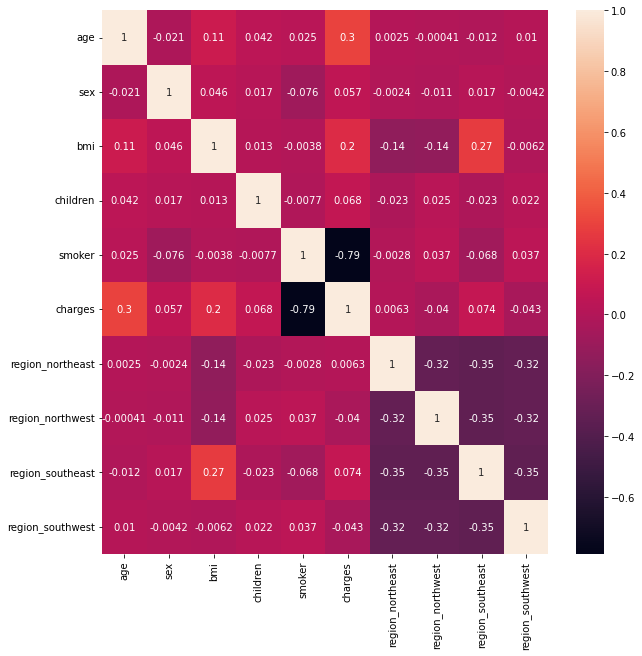

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.savefig("Heatmap of Medical charges.jpeg")

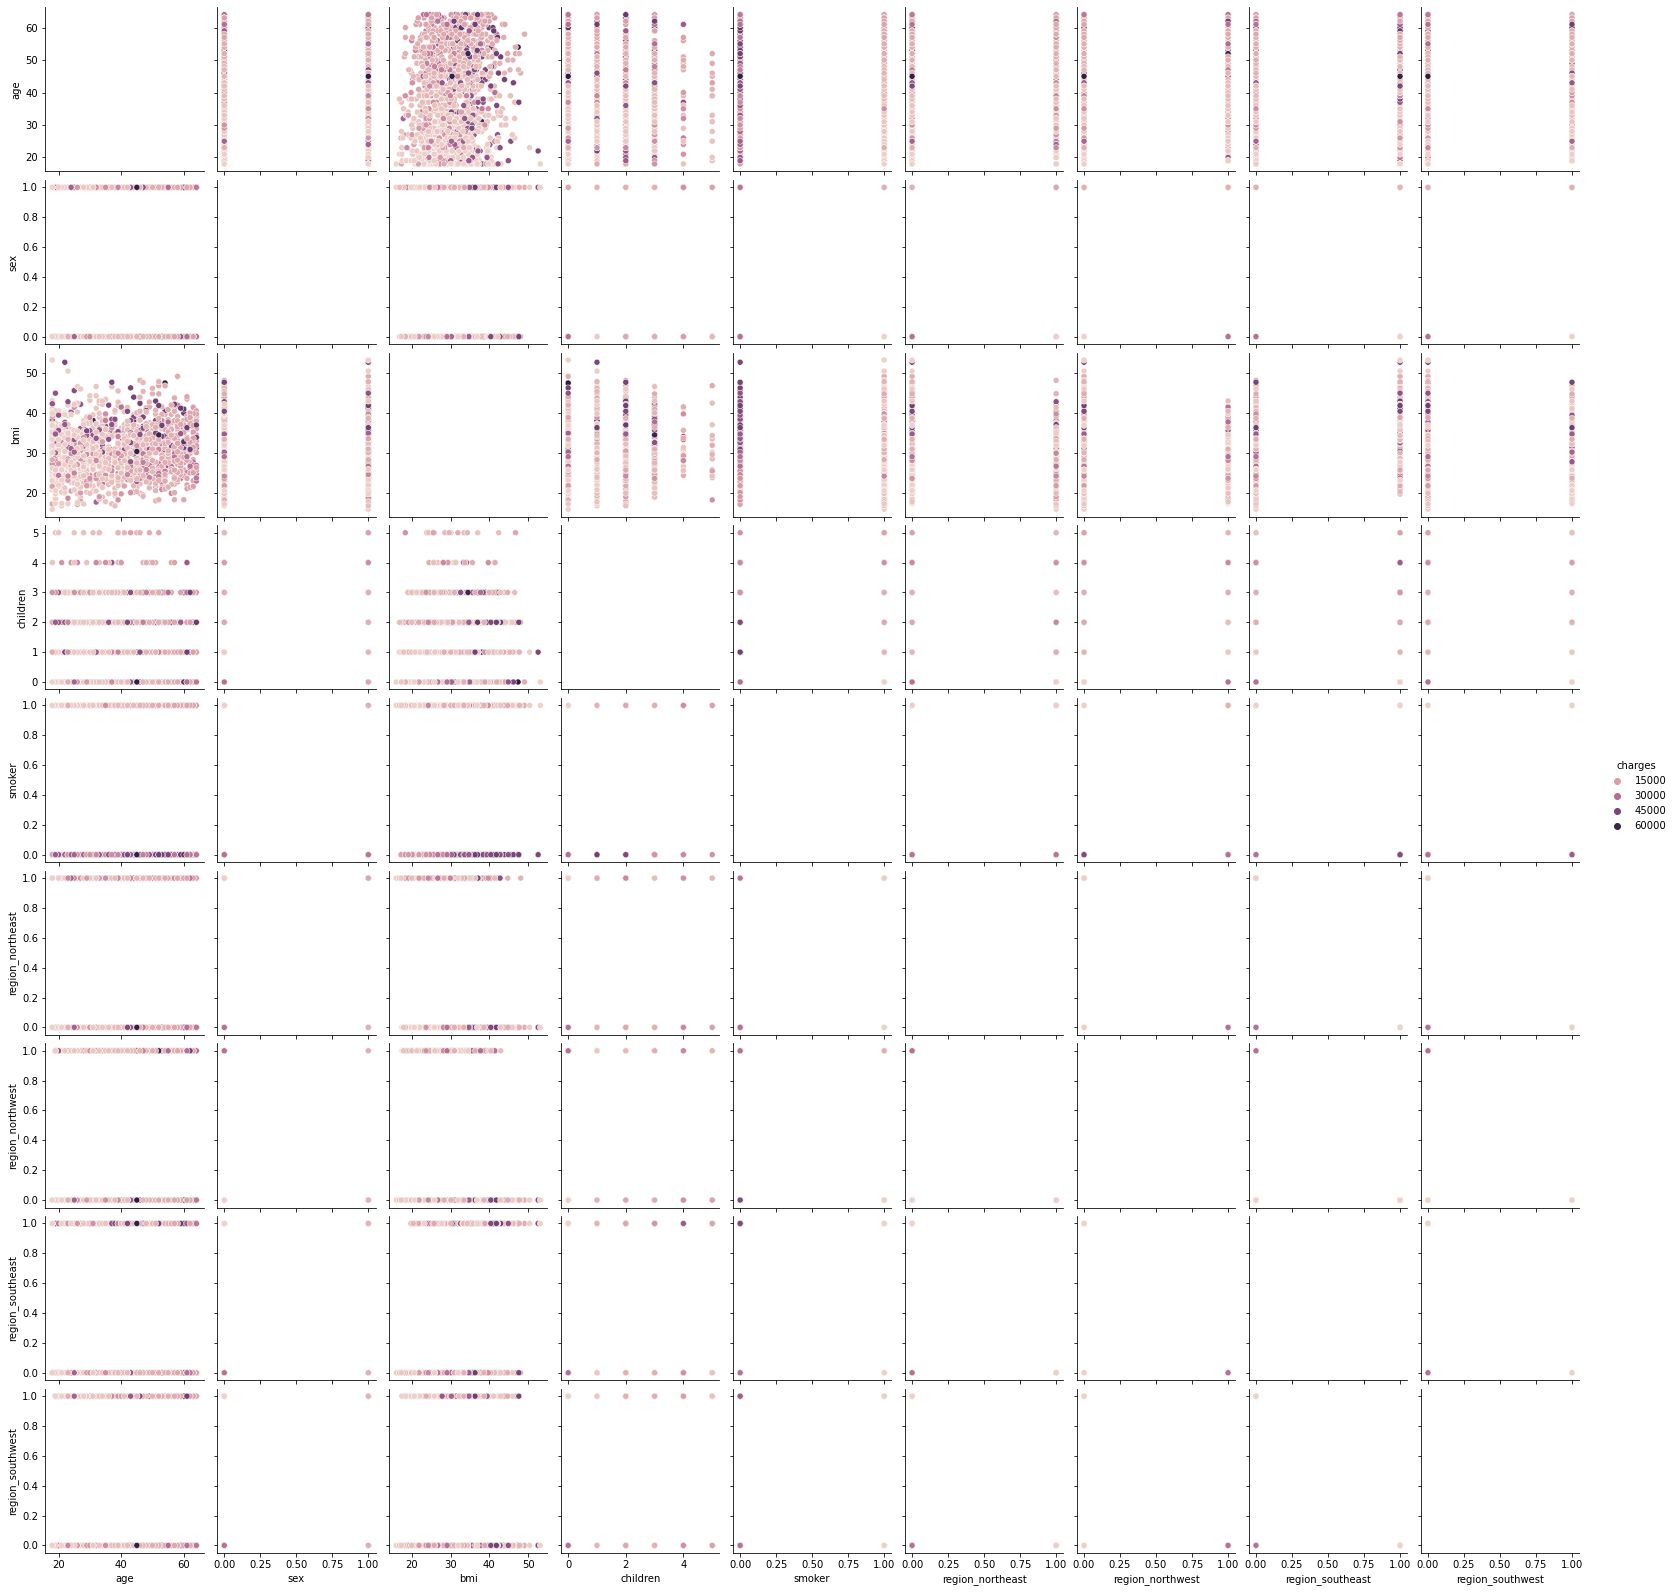

In [21]:
sns.pairplot(df, hue = "charges")
plt.savefig("Pairplot of Medical charges.jpeg")

## 6) Model training

In [27]:
# train test split

df = df.select_dtypes(exclude = object)
x = df.drop("charges", axis = 1)
y = df["charges"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 34)
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
414,19,0,35.150,0,1,0,1,0,0
1279,25,0,26.790,2,1,0,1,0,0
647,40,0,23.370,3,1,1,0,0,0
764,45,0,25.175,2,1,1,0,0,0
1133,52,0,18.335,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
453,20,1,29.735,0,1,0,1,0,0
324,29,1,27.200,0,1,0,0,0,1
1109,45,1,20.350,3,1,0,0,1,0
490,19,0,32.900,0,1,0,0,0,1


## 7) Model Training

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Testing data evaluation

In [37]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

r2 = r2_score(y_test, y_pred)
print("r2_score: ", r2)

MSE:  41587655.825483024
RMSE:  6448.849186132595
MAE:  4420.543383291356
r2_score:  0.7442111491697807


## Training data evaluation

In [39]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE: ", mae)

r2 = r2_score(y_train, y_pred_train)
print("r2_score: ", r2)

MSE:  35291933.48241179
RMSE:  5940.7014301689815
MAE:  4101.112694905446
r2_score:  0.7519747760752101


## testing on singl row

In [43]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19.0,18.00,28.0,33.000,32.00,31.00,46.00,37.00,37.00,60.00,...,23.000,52.0,57.00,23.0,52.0,50.00,18.00,18.00,21.0,61.00
sex,0.0,1.00,1.0,1.000,1.00,0.00,0.00,0.00,1.00,0.00,...,0.000,1.0,0.00,0.0,0.0,1.00,0.00,0.00,0.0,0.00
bmi,27.9,33.77,33.0,22.705,28.88,25.74,33.44,27.74,29.83,25.84,...,24.225,38.6,25.74,33.4,44.7,30.97,31.92,36.85,25.8,29.07
children,0.0,1.00,3.0,0.000,0.00,0.00,1.00,3.00,2.00,0.00,...,2.000,2.0,2.00,0.0,3.0,3.00,0.00,0.00,0.0,0.00
smoker,0.0,1.00,1.0,1.000,1.00,1.00,1.00,1.00,1.00,1.00,...,1.000,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.0,0.00
region_northeast,0.0,0.00,0.0,0.000,0.00,0.00,0.00,0.00,1.00,0.00,...,1.000,0.0,0.00,0.0,0.0,0.00,1.00,0.00,0.0,0.00
region_northwest,0.0,0.00,0.0,1.000,1.00,0.00,0.00,1.00,0.00,1.00,...,0.000,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.0,1.00
region_southeast,0.0,1.00,1.0,0.000,0.00,1.00,1.00,0.00,0.00,0.00,...,0.000,0.0,1.00,0.0,0.0,0.00,0.00,1.00,0.0,0.00
region_southwest,1.0,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,1.0,0.00,1.0,1.0,0.00,0.00,0.00,1.0,0.00


In [44]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region_northeast,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,1.0


In [45]:
age = 25
sex = "male"
bmi = 36
children = 2
smoker = "no"
region = "southwest"

#charges =?

In [47]:
columns_name = x.columns
columns_name

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [48]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
test_array[0] = age
test_array[1] = label_encoded_data["sex"][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = label_encoded_data["smoker"][smoker]

#test_array[0] = region

In [53]:
label_encoded_data = {"sex":{"female":0, "male":1},
                      "smoker":{"no":1, "yes":0}
                     }

In [56]:
label_encoded_data["smoker"][smoker]
label_encoded_data["sex"][sex]

1

In [58]:
region = "region_" + region
region

'region_southwest'

In [60]:
columns_name

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [64]:
region_index = np.where(columns_name == region)[0][0]
region_index

8

In [66]:
test_array[region_index] = 1

In [67]:
test_array

array([25.,  1., 36.,  2.,  1.,  0.,  0.,  0.,  1.])

In [76]:
np.around(model.predict([test_array])[0], 2)

6287.09

## Create model file

In [78]:
import pickle

with open("Linear_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [79]:
label_encoded_data

{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 1, 'yes': 0}}

In [80]:
list(x.columns)

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [81]:
project_data = {'sex': {'female': 0, 'male': 1},
                'smoker': {'no': 1, 'yes': 0},
               "columns":list(x.columns)}

In [82]:
import json
with open("project_data.json", "w") as f:
    json.dump(project_data, f)

# 8) Flask 

# 9) Deployments